In [1]:
# (C) Copyright Aaron Goldberg, 2022.
#
# This code is licensed under the Apache License, Version 2.0. You may
# obtain a copy of this license in the LICENSE.txt file in the root directory
# of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.
#
# Any modifications or derivative works of this code must retain this
# copyright notice, and modified files need to carry a notice indicating
# that they have been altered from the originals.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import strawberryfields as sf

# How much does the QCS change with loss? Squeezing?



2023-01-13 17:28:37.593399: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


QCS: 0.9003295829071486 standard deviation 0.042160755580873406
expected transmission 0.19019622695534996 calculated transmission 0.20101935310830535 uncertainty estimated eta 0.00017914284929567605
[0.9198211055276382, 0.06462914572864321, 0.013148743718592966, 0.0019969849246231157, 0.000335678391959799, 5.628140703517588e-05, 1.2060301507537688e-05, 0.0, 0.0]
QCS: 0.808670066477463 standard deviation 0.10634852882623738
expected transmission 0.19019622695534996 calculated transmission 0.1900708487027091 uncertainty estimated eta 0.0008271223278322561
[0.8265619335347432, 0.12147029204431017, 0.03670392749244713, 0.010475327291037262, 0.003287009063444109, 0.0010302114803625378, 0.000311178247734139, 0.00010372608257804632, 3.2225579053373614e-05, 1.6112789526686807e-05, 6.042296072507553e-06, 2.014098690835851e-06, 0.0]
QCS: 0.7604879218517303 standard deviation 0.16148019742231626
expected transmission 0.19019622695534996 calculated transmission 0.1833797532748869 uncertainty estim

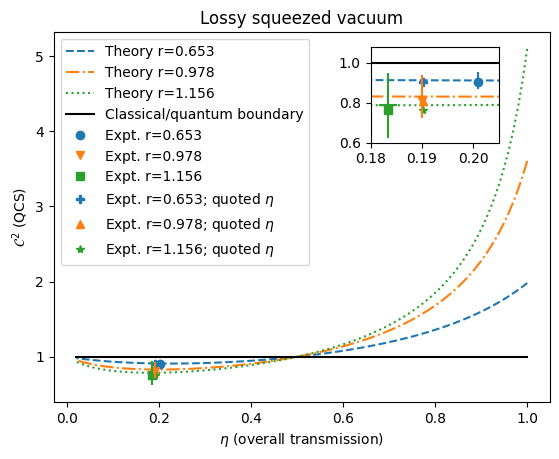

expected: 0.910326856804618 , 0.8296426921283487 , 0.7863784774587921
distance : -0.009997273897469405 , -0.020972625650885757 , -0.02589055560706177
std : 0.042160755580873406 , 0.10634852882623738 , 0.16148019742231626


In [16]:
from scipy.special import factorial
from scipy.special import binom, comb



def QCS_SV(eta,r):
    return 1/(1+(1-2*eta)*(eta*np.cosh(2*r)-eta)/(eta*np.cosh(2*r)-eta+1))

eta_from_device=0.385*0.885*0.938 *0.837* 0.711
num_etas=100
etas=[1.0-j/(num_etas+1) for j in range(num_etas)]

def my_delta(m,n):
    if m==n:
        return 1
    else:
        return 0

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

my_r_low=0.653
QCS_r0_5=[QCS_SV(etas[j],my_r_low) for j in range(num_etas)]
my_samples=np.loadtxt(f'QCS_SV_r{my_r_low}.csv', delimiter=',', dtype=int)
shots=len(my_samples)
modes=len(my_samples[1])
max_photon=np.amax(my_samples)
my_probs=[np.count_nonzero(my_samples[:,1] == n)/shots for n in range(max_photon+1)] 
out_QCS_low=1.+2*np.sum([n*((-1)**n) * my_probs[n] for n in range(max_photon+1)])/np.sum([((-1)**n) * my_probs[n] for n in range(max_photon+1)])
out_pur_low=np.sum([((-1)**n) * my_probs[n] for n in range(max_photon+1)])
out_energy=np.sum([n * my_probs[n] for n in range(max_photon+1)])
transmission_calculated_low=out_energy/(np.sinh(my_r_low)**2)
eta_uncertainty_low=np.sqrt(np.sum([(n**2) * my_probs[n] for n in range(max_photon+1)])-(out_energy**2))/(np.sqrt(shots-1)/np.sinh(my_r_low)**2)
upper_state_cutoff=100 
lossy_probabilities=[sum([binom(n,m)*transmission_calculated_low**m*(1-transmission_calculated_low)**(n-m)*(np.tanh(my_r_low)/2)**(2*n)*binom(2*n,n)/np.cosh(my_r_low) for n in range(upper_state_cutoff)]) for m in range(max_photon+1)]
my_errs=[(lossy_probabilities[n]-my_probs[n])**2 for n in range(max_photon+1)]
out_var_low=np.sum([(my_errs[n])*(1/out_pur_low**2) *(2*n+1-out_QCS_low)*(2*n+1-out_QCS_low) for n in range(max_photon+1)])/3
print("QCS:", out_QCS_low,"standard deviation", np.sqrt(out_var_low))
print("expected transmission", eta_from_device,"calculated transmission",transmission_calculated_low,"uncertainty estimated eta",eta_uncertainty_low)
print(my_probs)

my_r_med=0.978
QCS_r1=[QCS_SV(etas[j],my_r_med) for j in range(num_etas)]
my_samples=np.loadtxt(f'QCS_SV_r{my_r_med}.csv', delimiter=',', dtype=int)
shots=len(my_samples)
modes=len(my_samples[1])
max_photon=np.amax(my_samples)
my_probs=[np.count_nonzero(my_samples[:,1] == n)/shots for n in range(max_photon+1)] 
out_QCS_med=1.+2*np.sum([n*((-1)**n) * my_probs[n] for n in range(max_photon+1)])/np.sum([((-1)**n) * my_probs[n] for n in range(max_photon+1)])
out_pur_med=np.sum([((-1)**n) * my_probs[n] for n in range(max_photon+1)])
out_energy=np.sum([n * my_probs[n] for n in range(max_photon+1)])
transmission_calculated_med=out_energy/(np.sinh(my_r_med)**2)
eta_uncertainty_med=np.sqrt(np.sum([(n**2) * my_probs[n] for n in range(max_photon+1)])-(out_energy**2))/(np.sqrt(shots-1)/np.sinh(my_r_med)**2)
upper_state_cutoff=100 
lossy_probabilities=[sum([binom(n,m)*transmission_calculated_med**m*(1-transmission_calculated_med)**(n-m)*(np.tanh(my_r_med)/2)**(2*n)*binom(2*n,n)/np.cosh(my_r_med) for n in range(upper_state_cutoff)]) for m in range(max_photon+1)]
my_errs=[(lossy_probabilities[n]-my_probs[n])**2 for n in range(max_photon+1)]
out_var_med=np.sum([(my_errs[n])*(1/out_pur_med**2) *(2*n+1-out_QCS_med)*(2*n+1-out_QCS_med) for n in range(max_photon+1)])/3
print("QCS:", out_QCS_med,"standard deviation", np.sqrt(out_var_med))
print("expected transmission", eta_from_device,"calculated transmission",transmission_calculated_med,"uncertainty estimated eta",eta_uncertainty_med)
print(my_probs)

my_r_high=1.156
QCS_r1_155=[QCS_SV(etas[j],my_r_high) for j in range(num_etas)]
my_samples=np.loadtxt(f'QCS_SV_r{my_r_high}.csv', delimiter=',', dtype=int)
shots=len(my_samples)
modes=len(my_samples[1])
max_photon=np.amax(my_samples)
my_probs=[np.count_nonzero(my_samples[:,1] == n)/shots for n in range(max_photon+1)] 
out_QCS_high=1.+2*np.sum([n*((-1)**n) * my_probs[n] for n in range(max_photon+1)])/np.sum([((-1)**n) * my_probs[n] for n in range(max_photon+1)])
out_pur_high=np.sum([((-1)**n) * my_probs[n] for n in range(max_photon+1)])
out_energy=np.sum([n * my_probs[n] for n in range(max_photon+1)])
transmission_calculated_high=out_energy/(np.sinh(my_r_high)**2)
eta_uncertainty_high=np.sqrt(np.sum([(n**2) * my_probs[n] for n in range(max_photon+1)])-(out_energy**2))/(np.sqrt(shots-1)/np.sinh(my_r_high)**2)
upper_state_cutoff=100 
lossy_probabilities=[sum([binom(n,m)*transmission_calculated_high**m*(1-transmission_calculated_high)**(n-m)*(np.tanh(my_r_high)/2)**(2*n)*binom(2*n,n)/np.cosh(my_r_high) for n in range(upper_state_cutoff)]) for m in range(max_photon+1)]
my_errs=[(lossy_probabilities[n]-my_probs[n])**2 for n in range(max_photon+1)]
out_var_high=np.sum([(my_errs[n])*(1/out_pur_high**2) *(2*n+1-out_QCS_high)*(2*n+1-out_QCS_high) for n in range(max_photon+1)])/3
print("QCS:", out_QCS_high,"standard deviation", np.sqrt(out_var_high))
print("expected transmission", eta_from_device,"calculated transmission",transmission_calculated_high,"uncertainty estimated eta",eta_uncertainty_high)
print(my_probs)

fig, ax = plt.subplots()

plt.plot(etas, QCS_r0_5, linestyle='--', color=colors[0])
plt.plot(etas, QCS_r1, linestyle='-.', color=colors[1])
plt.plot(etas, QCS_r1_155, linestyle=':', color=colors[2])
plt.plot(etas, [1. for j in range(num_etas)], 'k')
plt.plot(transmission_calculated_low,out_QCS_low,'o', color=colors[0])
plt.plot(transmission_calculated_med,out_QCS_med,'v', color=colors[1])
plt.plot(transmission_calculated_high,out_QCS_high,'s', color=colors[2])
plt.plot(eta_from_device,out_QCS_low,'P', color=colors[0])
plt.plot(eta_from_device,out_QCS_med,'^', color=colors[1])
plt.plot(eta_from_device,out_QCS_high,'*', color=colors[2])
plt.errorbar(transmission_calculated_low,QCS_SV(transmission_calculated_low,my_r_low), xerr=eta_uncertainty_low,yerr=np.sqrt(out_var_low), color=colors[0])
plt.errorbar(transmission_calculated_med,QCS_SV(transmission_calculated_med,my_r_med), xerr=eta_uncertainty_med,yerr=np.sqrt(out_var_med), color=colors[1])
plt.errorbar(transmission_calculated_high,QCS_SV(transmission_calculated_high,my_r_high), xerr=eta_uncertainty_high,yerr=np.sqrt(out_var_high), color=colors[2])
plt.xlabel(r'$\eta$ (overall transmission)')
plt.ylabel(r'$\mathcal{C}^2$ (QCS)')
plt.legend([f'Theory r={my_r_low}',f'Theory r={my_r_med}',f'Theory r={my_r_high}','Classical/quantum boundary',f'Expt. r={my_r_low}',f'Expt. r={my_r_med}',f'Expt. r={my_r_high}',f'Expt. r={my_r_low}; quoted $\eta$',f'Expt. r={my_r_med}; quoted $\eta$',f'Expt. r={my_r_high}; quoted $\eta$'])
plt.title('Lossy squeezed vacuum')

left, bottom, width, height = [0.62, 0.65, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(etas, QCS_r0_5, linestyle='--', color=colors[0])
ax2.plot(etas, QCS_r1, linestyle='-.', color=colors[1])
ax2.plot(etas, QCS_r1_155, linestyle=':', color=colors[2])
ax2.plot(etas, [1. for j in range(num_etas)], 'k')
ax2.plot(transmission_calculated_low,out_QCS_low,'o', color=colors[0])
ax2.plot(transmission_calculated_med,out_QCS_med,'v', color=colors[1])
ax2.plot(transmission_calculated_high,out_QCS_high,'s', color=colors[2])
ax2.plot(eta_from_device,out_QCS_low,'P', color=colors[0])
ax2.plot(eta_from_device,out_QCS_med,'^', color=colors[1])
ax2.plot(eta_from_device,out_QCS_high,'*', color=colors[2])
ax2.errorbar(transmission_calculated_low,QCS_SV(transmission_calculated_low,my_r_low), xerr=eta_uncertainty_low,yerr=np.sqrt(out_var_low), color=colors[0])
ax2.errorbar(transmission_calculated_med,QCS_SV(transmission_calculated_med,my_r_med), xerr=eta_uncertainty_med,yerr=np.sqrt(out_var_med), color=colors[1])
ax2.errorbar(transmission_calculated_high,QCS_SV(transmission_calculated_high,my_r_high), xerr=eta_uncertainty_high,yerr=np.sqrt(out_var_high), color=colors[2])
x1, x2, y1, y2 = 0.18, 0.205, 0.6, 1.08
ax2.set_xlim(x1, x2)
ax2.set_ylim(y1, y2)


plt.savefig('QCS_vs_loss_SV_darkErrors.pdf')
plt.show()
print("expected:",QCS_SV(transmission_calculated_low,my_r_low),",",QCS_SV(transmission_calculated_med,my_r_med),",",QCS_SV(transmission_calculated_high,my_r_high))
print("distance :",out_QCS_low-QCS_SV(transmission_calculated_low,my_r_low),",",out_QCS_med-QCS_SV(transmission_calculated_med,my_r_med),",",out_QCS_high-QCS_SV(transmission_calculated_high,my_r_high))
print("std :",np.sqrt(out_var_low),",",np.sqrt(out_var_med),",",np.sqrt(out_var_high))

QCS: 0.7916402818528825 standard deviation 0.0451305058973575
expected transmission 0.2669348682 calculated transmission 0.2564695293754462 uncertainty estimated eta 0.00018364070664554728
[0.8873684738955824, 0.10087751004016064, 0.010478915662650603, 0.00113855421686747, 0.00011947791164658634, 1.5060240963855421e-05, 2.0080321285140564e-06, 0.0, 0.0, 0.0, 0.0, 0.0] [0.038840282248706004, 0.00041272375515324434, 9.394793355090136e-06, 1.4067336419809282e-07, 2.4678484832350767e-09, 1.4774923549138577e-11, 1.0941580664320578e-14, 5.574258784887983e-14, 6.961866112192167e-16, 8.694892295902557e-18, 1.0859322891163763e-19, 1.3562547946697982e-21]
QCS: 0.5840871565931766 standard deviation 0.25798085722874575
expected transmission 0.2669348682 calculated transmission 0.24472707225148915 uncertainty estimated eta 0.0008346385462022565
[0.7544678068410463, 0.18903722334004025, 0.04350301810865191, 0.01000804828973843, 0.002280684104627767, 0.0005432595573440644, 0.00013279678068410462, 1.9

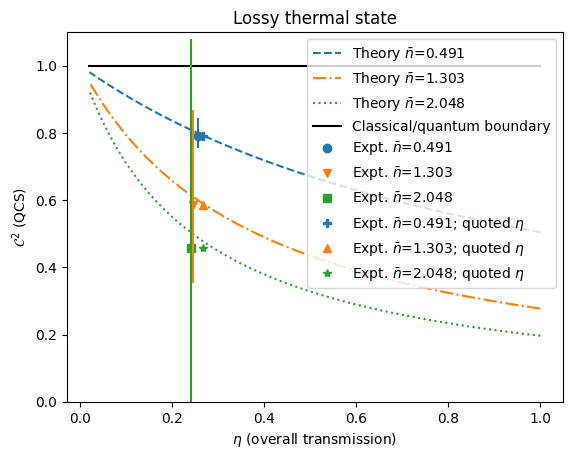

expected: 0.7989565435022211 , 0.6105718613596465 , 0.503878859460124
distance : -0.007316261649338629 , -0.026484704766469913 , -0.04522689867581009
std : 0.0451305058973575 , 0.25798085722874575 , 0.5768091878638753


In [25]:
from scipy.special import factorial
from scipy.special import binom, comb

def QCS_Th(eta,r):
    return 1/(1+2*eta*(np.sinh(r)**2))

eta_from_device=0.385*0.885*0.837*0.936
num_etas=100
etas=[1.0-j/(num_etas+1) for j in range(num_etas)]

def my_delta(m,n):
    if m==n:
        return 1
    else:
        return 0

    
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']



my_r_low=0.653
QCS_r0_5=[QCS_Th(etas[j],my_r_low) for j in range(num_etas)]
my_samples=np.loadtxt(f'QCS_Th_r{my_r_low}.csv', delimiter=',', dtype=int)
shots=len(my_samples)
modes=len(my_samples[1])
max_photon=np.amax(my_samples)
my_probs=[np.count_nonzero(my_samples[:,0] == n)/shots for n in range(max_photon+1)] 
out_QCS_low=1.+2*np.sum([n*((-1)**n) * my_probs[n] for n in range(max_photon+1)])/np.sum([((-1)**n) * my_probs[n] for n in range(max_photon+1)])
out_pur_low=np.sum([((-1)**n) * my_probs[n] for n in range(max_photon+1)])
out_energy=np.sum([n * my_probs[n] for n in range(max_photon+1)])
transmission_calculated_low=out_energy/(np.sinh(my_r_low)**2)
eta_uncertainty_low=np.sqrt(np.sum([(n**2) * my_probs[n] for n in range(max_photon+1)])-(out_energy**2))/(np.sqrt(shots-1)/np.sinh(my_r_low)**2)
upper_state_cutoff=100 
lossy_probabilities=[sum([binom(n,m)*transmission_calculated_low**m*(1-transmission_calculated_low)**(n-m)*(np.tanh(my_r_low))**(2*n)/np.cosh(my_r_low) for n in range(upper_state_cutoff)]) for m in range(max_photon+1)]
my_errs=[(lossy_probabilities[n]-my_probs[n])**2 for n in range(max_photon+1)]
out_var_low=np.sum([(my_errs[n])*(1/out_pur_low**2) *(2*n+1-out_QCS_low)*(2*n+1-out_QCS_low) for n in range(max_photon+1)])/3
print("QCS:", out_QCS_low,"standard deviation", np.sqrt(out_var_low))
print("expected transmission", eta_from_device,"calculated transmission",transmission_calculated_low,"uncertainty estimated eta",eta_uncertainty_low)
print(my_probs, my_errs)

my_r_med=0.978
QCS_r1=[QCS_Th(etas[j],my_r_med) for j in range(num_etas)]
my_samples=np.loadtxt(f'QCS_Th_r{my_r_med}.csv', delimiter=',', dtype=int)
shots=len(my_samples)
modes=len(my_samples[1])
max_photon=np.amax(my_samples)
my_probs=[np.count_nonzero(my_samples[:,0] == n)/shots for n in range(max_photon+1)] 
out_QCS_med=1.+2*np.sum([n*((-1)**n) * my_probs[n] for n in range(max_photon+1)])/np.sum([((-1)**n) * my_probs[n] for n in range(max_photon+1)])
out_pur_med=np.sum([((-1)**n) * my_probs[n] for n in range(max_photon+1)])
out_energy=np.sum([n * my_probs[n] for n in range(max_photon+1)])
transmission_calculated_med=out_energy/(np.sinh(my_r_med)**2)
eta_uncertainty_med=np.sqrt(np.sum([(n**2) * my_probs[n] for n in range(max_photon+1)])-(out_energy**2))/(np.sqrt(shots-1)/np.sinh(my_r_med)**2)
upper_state_cutoff=100 
lossy_probabilities=[sum([binom(n,m)*transmission_calculated_med**m*(1-transmission_calculated_med)**(n-m)*(np.tanh(my_r_low))**(2*n)/np.cosh(my_r_low) for n in range(upper_state_cutoff)]) for m in range(max_photon+1)]
my_errs=[(lossy_probabilities[n]-my_probs[n])**2 for n in range(max_photon+1)]
out_var_med=np.sum([(my_errs[n])*(1/out_pur_med**2) *(2*n+1-out_QCS_med)*(2*n+1-out_QCS_med) for n in range(max_photon+1)])/3
print("QCS:", out_QCS_med,"standard deviation", np.sqrt(out_var_med))
print("expected transmission", eta_from_device,"calculated transmission",transmission_calculated_med,"uncertainty estimated eta",eta_uncertainty_med)
print(my_probs)


my_r_high=1.156
QCS_r1_155=[QCS_Th(etas[j],my_r_high) for j in range(num_etas)]
my_samples=np.loadtxt(f'QCS_Th_r{my_r_high}.csv', delimiter=',', dtype=int)
shots=len(my_samples)
modes=len(my_samples[1])
max_photon=np.amax(my_samples)
my_probs=[np.count_nonzero(my_samples[:,0] == n)/shots for n in range(max_photon+1)] 
out_QCS_high=1.+2*np.sum([n*((-1)**n) * my_probs[n] for n in range(max_photon+1)])/np.sum([((-1)**n) * my_probs[n] for n in range(max_photon+1)])
out_pur_high=np.sum([((-1)**n) * my_probs[n] for n in range(max_photon+1)])
out_energy=np.sum([n * my_probs[n] for n in range(max_photon+1)])
transmission_calculated_high=out_energy/(np.sinh(my_r_high)**2)
upper_state_cutoff=100 
lossy_probabilities=[sum([binom(n,m)*transmission_calculated_high**m*(1-transmission_calculated_high)**(n-m)*(np.tanh(my_r_low))**(2*n)/np.cosh(my_r_low) for n in range(upper_state_cutoff)]) for m in range(max_photon+1)]
eta_uncertainty_high=np.sqrt(np.sum([(n**2) * my_probs[n] for n in range(max_photon+1)])-(out_energy**2))/(np.sqrt(shots-1)/np.sinh(my_r_high)**2)
my_errs=[(lossy_probabilities[n]-my_probs[n])**2 for n in range(max_photon+1)]
out_var_high=np.sum([(my_errs[n])*(1/out_pur_high**2) *(2*n+1-out_QCS_high)*(2*n+1-out_QCS_high) for n in range(max_photon+1)])/3
print("QCS:", out_QCS_high,"standard deviation", np.sqrt(out_var_high))
print("expected transmission", eta_from_device,"calculated transmission",transmission_calculated_high,"uncertainty estimated eta",eta_uncertainty_high)
print(my_probs)

fig, ax = plt.subplots()

plt.plot(etas, QCS_r0_5, color=colors[0],linestyle='--')
plt.plot(etas, QCS_r1, color=colors[1],linestyle='-.')
plt.plot(etas, QCS_r1_155, color=colors[2],linestyle=':')
plt.plot(etas, [1. for j in range(num_etas)], 'k')
plt.plot(transmission_calculated_low,out_QCS_low,'o', color=colors[0])
plt.plot(transmission_calculated_med,out_QCS_med,'v', color=colors[1])
plt.plot(transmission_calculated_high,out_QCS_high,'s', color=colors[2])
plt.plot(eta_from_device,out_QCS_low,'P', color=colors[0])
plt.plot(eta_from_device,out_QCS_med,'^', color=colors[1])
plt.plot(eta_from_device,out_QCS_high,'*', color=colors[2])
plt.errorbar(transmission_calculated_low,QCS_Th(transmission_calculated_low,my_r_low), xerr=eta_uncertainty_low,yerr=np.sqrt(out_var_low), color=colors[0])
plt.errorbar(transmission_calculated_med,QCS_Th(transmission_calculated_med,my_r_med), xerr=eta_uncertainty_med,yerr=np.sqrt(out_var_med), color=colors[1])
plt.errorbar(transmission_calculated_high,QCS_Th(transmission_calculated_high,my_r_high), xerr=eta_uncertainty_high,yerr=np.sqrt(out_var_high), color=colors[2])
plt.xlabel(r'$\eta$ (overall transmission)')
plt.ylabel(r'$\mathcal{C}^2$ (QCS)')
plt.legend([fr'Theory $\bar{{n}}$={round(np.sinh(my_r_low)**2,3)}',fr'Theory $\bar{{n}}$={round(np.sinh(my_r_med)**2,3)}',fr'Theory $\bar{{n}}$={round(np.sinh(my_r_high)**2,3)}','Classical/quantum boundary',fr'Expt. $\bar{{n}}$={round(np.sinh(my_r_low)**2,3)}',fr'Expt. $\bar{{n}}$={round(np.sinh(my_r_med)**2,3)}',fr'Expt. $\bar{{n}}$={round(np.sinh(my_r_high)**2,3)}',fr'Expt. $\bar{{n}}$={round(np.sinh(my_r_low)**2,3)}; quoted $\eta$',fr'Expt. $\bar{{n}}$={round(np.sinh(my_r_med)**2,3)}; quoted $\eta$',fr'Expt. $\bar{{n}}$={round(np.sinh(my_r_high)**2,3)}; quoted $\eta$'],loc='upper right')
plt.title('Lossy thermal state')
plt.ylim((0,1.1))


plt.savefig('QCS_vs_loss_Th_darkErrors.pdf')
plt.show()
print("expected:",QCS_Th(transmission_calculated_low,my_r_low),",",QCS_Th(transmission_calculated_med,my_r_med),",",QCS_Th(transmission_calculated_high,my_r_high))
print("distance :",out_QCS_low-QCS_Th(transmission_calculated_low,my_r_low),",",out_QCS_med-QCS_Th(transmission_calculated_med,my_r_med),",",out_QCS_high-QCS_Th(transmission_calculated_high,my_r_high))
print("std :",np.sqrt(out_var_low),",",np.sqrt(out_var_med),",",np.sqrt(out_var_high))